<a href="https://colab.research.google.com/github/Hetvi07/Age_Group_Detection_From_Images/blob/master/datasets_prep_traditional_ml_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Mount Google Drive {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Imports
# Please refer to requirements.txt for a full list of all libraries and their versions used in this project.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import gaussian, sobel
from skimage.feature import canny

import os
from zipfile import ZipFile
import time
from datetime import datetime

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

## Dataset Preparation

In [ ]:
# Unzipping the dataset file combined_faces.zip

combined_faces_zip_path = "/content/drive/My Drive/Faces_datasets/zipped_datasets/combined_faces.zip"

with ZipFile(combined_faces_zip_path, 'r') as myzip:
    myzip.extractall()
    print('Done unzipping combined_faces.zip')

Done unzipping combined_faces.zip


In [ ]:
# Accessing all image file names.

combined_faces_path = "/content/content/combined_faces"
combined_faces_image_names = os.listdir(combined_faces_path)

In [ ]:
len(combined_faces_image_names)

33486

### Train and Test Splitting

Before performing any form of classification or feature extraction on the images, it is necessary to **split the *combined_faces* dataset into training and testing datasets**. Separate features extraction will then be done for the training and testing datasets.

In [ ]:
combined_classes = pd.read_csv("/content/drive/My Drive/Age_classification_with_faces/input_output/combined_faces_classes_summary.csv")
combined_classes

,Class label,Age-ranges (classes),No. of images,Class balance (%)
0,0,1 - 2,3192,9.53
1,1,3 - 9,2816,8.41
2,2,10 - 20,3136,9.37
3,3,21 - 25,3474,10.37
4,4,26 - 27,3217,9.61
5,5,28 - 31,3063,9.15
6,6,32 - 36,3086,9.22
7,7,37 - 45,3207,9.58
8,8,46 - 54,2802,8.37
9,9,55 - 65,2796,8.35


In [ ]:
# Defining a function to return the class labels corresponding to the age-ranges shown above.

def class_labels(age):
    if 1 <= age <= 2:
        return 0
    elif 3 <= age <= 9:
        return 1
    elif 10 <= age <= 20:
        return 2
    elif 21 <= age <= 25:
        return 3
    elif 26 <= age <= 27:
        return 4
    elif 28 <= age <= 31:
        return 5
    elif 32 <= age <= 36:
        return 6
    elif 37 <= age <= 45:
        return 7
    elif 46 <= age <= 54:
        return 8
    elif 55 <= age <= 65:
        return 9
    else:
        return 10

In [ ]:
# Creating a new dataframe to hold all filenames, corresponding ages and class labels.

master_df = pd.DataFrame()
master_df['filename'] = combined_faces_image_names
master_df['age'] = master_df['filename'].map(lambda img_name : np.uint8(img_name.split("_")[0]))
master_df['target'] = master_df['age'].map(class_labels)

master_df.head()

,filename,age,target
0,11_66.jpg,11,2
1,1_824.jpg,1,0
2,62_87.jpg,62,9
3,65_73.jpg,65,9
4,14_98.jpg,14,2


In [ ]:
# Shuffling the rows of combined_df so as to mix together the rows coming from both subreddit datasets.

master_df = shuffle(master_df, random_state=42).reset_index(drop=True)
master_df.head()

,filename,age,target
0,17_171.jpg,17,2
1,34_385.jpg,34,6
2,36_558.jpg,36,6
3,22_465.jpg,22,3
4,35_518.jpg,35,6


In [ ]:
# Defining the filenames and ages from above master_df as X, and target as y for splitting into train and test datasets later.

X = master_df[['filename', 'age']]
y = master_df['target']

In [ ]:
# Splitting the dataset into training and testing datasets with test_size=0.3 and stratify=y. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

In [ ]:
X_train.shape

(23440, 2)

In [ ]:
X_train.head()

,filename,age
25967,18_369.jpg,18
29317,5_42.jpg,5
12371,5_204.jpg,5
28410,39_24.jpg,39
31624,22_41.jpg,22


In [ ]:
X_test.shape

(10046, 2)

In [ ]:
X_test.head()

,filename,age
5944,8_163.jpg,8
11125,38_66.jpg,38
14508,40_177.jpg,40
4809,36_267.jpg,36
27419,8_349.jpg,8


In [ ]:
y_train.value_counts(normalize=True)

3     0.103754
4     0.096075
7     0.095776
0     0.095307
2     0.093643
6     0.092150
5     0.091468
1     0.084087
8     0.083703
9     0.083490
10    0.080546
Name: target, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

3     0.103723
4     0.096058
7     0.095760
0     0.095361
2     0.093669
6     0.092176
5     0.091479
1     0.084113
8     0.083615
9     0.083516
10    0.080530
Name: target, dtype: float64

In [ ]:
# Creating copies of X and y (both train and test) from above to create a dataframe of filepaths to all images and their target labels.
# These dataframes will be in the deep learning models later to create dataset input pipelines using TensorFlow.data.Dataset API.

temp_X_train = X_train.copy()
temp_X_train['target'] = y_train

temp_X_test = X_test.copy()
temp_X_test['target'] = y_test

In [ ]:
# Defining a function to append the filepath to each image name as a string.

combined_faces_path = "/content/content/combined_faces"

def append_path_to_filename(filename):
    return os.path.join(combined_faces_path, filename)

In [ ]:
# Mapping the above created function on both dataframes created above.

temp_X_train['filename'] = temp_X_train['filename'].map(append_path_to_filename)
temp_X_test['filename'] = temp_X_test['filename'].map(append_path_to_filename)

In [ ]:
# Exporting the above created dataframes as CSV files.

temp_X_train.to_csv("/content/drive/My Drive/Age_classification_with_faces/input_output/images_filenames_labels_train.csv", index=False)
temp_X_test.to_csv("/content/drive/My Drive/Age_classification_with_faces/input_output/images_filenames_labels_test.csv", index=False)

## Traditional ML: Feature Extraction using Image Filters

There are a variety of techniques available out there that deal with feature extraction from images for classification modelling (for instance, [Histogram of Oriented Gradients (HOG)](https://www.youtube.com/watch?v=4ESLTAd3IOM), [energy and entropy of filtered images](https://youtu.be/V724O1yc0yU), [mean pixel values of channels](https://www.analyticsvidhya.com/blog/2019/08/3-techniques-extract-features-from-image-data-machine-learning-python/), etc.).

In order to extract features from the facial images, I will now **apply a few different filters on some images** from the dataset and try to **visually spot any significant differences between them**.

In [ ]:
def give_col_image(path):
    img = cv2.imread(path)
    col_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    
    return col_img

In [ ]:
def give_gray_image(col_img):
    gray_img = cv2.cvtColor(col_img, cv2.COLOR_BGR2GRAY)
    
    return gray_img

In [ ]:
def give_gaussian_image(gray_img):
    gaussian_img = gaussian(gray_img, sigma=4)
    
    return gaussian_img

In [ ]:
def give_entropy_image(gray_img):
    entropy_img = entropy(gray_img, disk(5))
    
    return entropy_img

In [ ]:
def give_gabor_image(gray_img):

    ksize = 5
    sigma = 0.5
    theta = 1*np.pi/4
    lamda = 1*np.pi/4
    gamma = 0.8
    phi = 0

    gabor_kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, phi, ktype=cv2.CV_32F)
    gabor_img = cv2.filter2D(gray_img, cv2.CV_8UC3, gabor_kernel)
    
    return gabor_img

In [ ]:
def give_sobel_image(gray_img):
    sobel_img = sobel(gray_img)
    
    return sobel_img

In [ ]:
def give_canny_image(gray_img):
    # canny_img = cv2.Canny(gray_img, 80, 180)
    canny_img = canny(gray_img, sigma=0.9)
    
    return canny_img

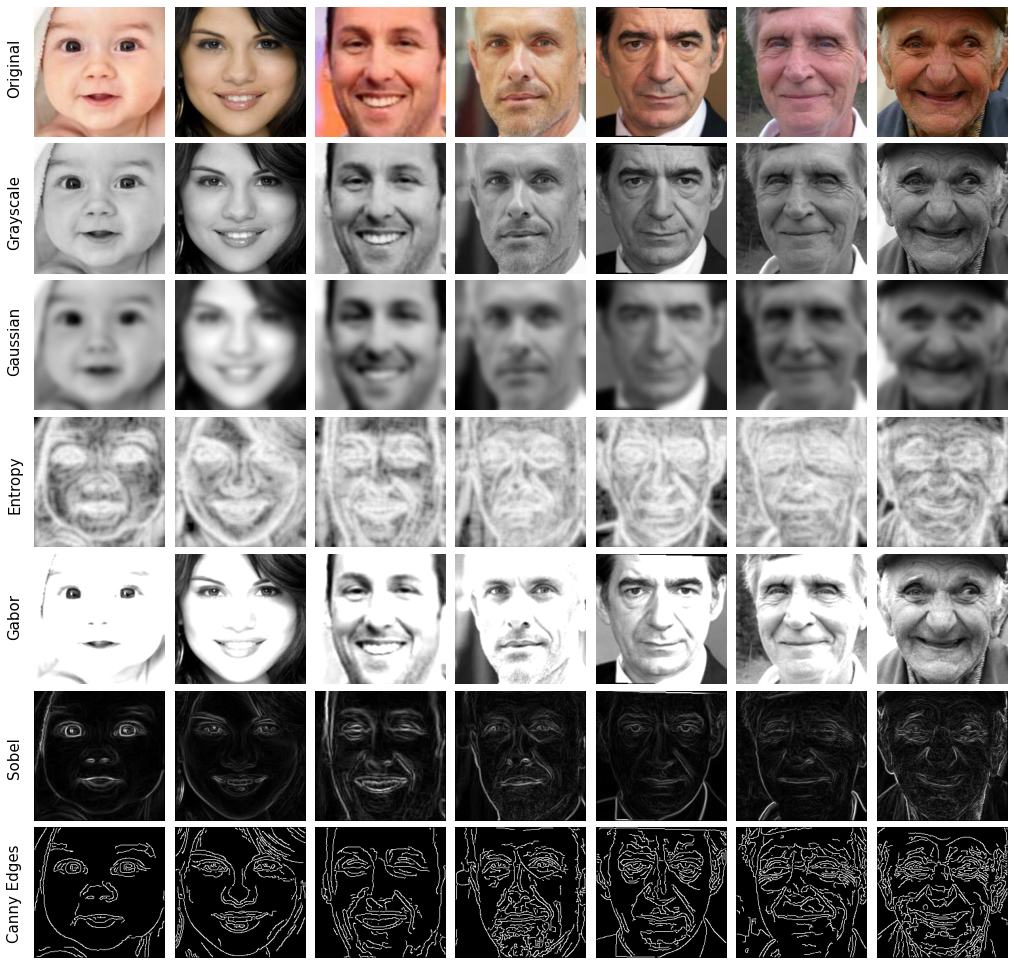

In [ ]:
sample_images_path = "/content/drive/My Drive/Age_classification_with_faces/sample_images"

sample_images = os.listdir(sample_images_path)

n_images = len(sample_images)

fig, ax = plt.subplots(nrows=7, ncols=n_images, figsize=(n_images*2.5, 17.5))
plt.gray()

ax= ax.ravel()

for i, img in enumerate(sample_images):
    
    img_path = os.path.join(sample_images_path, img)
    
    col_img = give_col_image(img_path)
    ax[i].imshow(col_img)
    ax[i].axis('off')
    
    gray_img = give_gray_image(col_img)
    ax[i+(n_images*1)].imshow(gray_img)
    ax[i+(n_images*1)].axis('off')
    
    gaussian_img = give_gaussian_image(gray_img)
    ax[i+(n_images*2)].imshow(gaussian_img)
    ax[i+(n_images*2)].axis('off')
    
    entropy_img = give_entropy_image(gray_img)
    ax[i+(n_images*3)].imshow(entropy_img)
    ax[i+(n_images*3)].axis('off')
    
    gabor_img = give_gabor_image(gray_img)
    ax[i+(n_images*4)].imshow(gabor_img)
    ax[i+(n_images*4)].axis('off')
    
    sobel_img = give_sobel_image(gray_img)
    ax[i+(n_images*5)].imshow(sobel_img)
    ax[i+(n_images*5)].axis('off')
    
    canny_img = give_canny_image(gray_img)
    ax[i+(n_images*6)].imshow(canny_img)
    ax[i+(n_images*6)].axis('off')
    
plt.subplots_adjust(hspace=0.05, wspace=0.05)

plt.figtext(x=0.105, y=0.81, s="Original", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.69, s="Grayscale", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.59, s="Gaussian", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.48, s="Entropy", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.38, s="Gabor", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.27, s="Sobel", fontsize=15, rotation=90)
plt.figtext(x=0.105, y=0.14, s="Canny Edges", fontsize=15, rotation=90)
    
# Exporting plot image in PNG format.
cur_time = datetime.fromtimestamp(time.time()).strftime('%Y%m%d%H%M%S')
plt.savefig(f"/content/drive/My Drive/Age_classification_with_faces/plot_images/filters_comparison_{cur_time}.png", bbox_inches='tight')

The faces in the above plot **increase in age as we move from left to right (1–90 years old)**. As each filter is applied to the images, we can see how different features in the faces are highlighted and whether or not they would be useful in differentiating between faces of different ages.

From the plot above, I can conclude that **Canny Edges may be the most useful filter for feature extraction** in this case — **as we move from younger to older faces, the density of Canny Edges in the images seem to increase**.

### Canny Edges Feature Extraction

Now that the filter of choice is identified, the next step is to convert the filtered images into scalars so as to be able to feed them into a machine learning classifier. To do this, I will **breakdown each 200x200 pixels image into sections of 10x10 pixels each**, as illustrated below. For each of the 400 resulting sections, I will **then calculate the mean and standard deviation of the pixel values**. This will result in **800 unique scalar values for each image**, which I will then tabulate into a dataframe to be used as features in a machine learning classifier.

![canny_sections_explained.png](https://drive.google.com/uc?export=view&id=19Oj6O_F2ft9_QJy9oUio4qVNbo_5rvPI)

**Separate feature extraction will be done from train (23,440 images) and test (10,046 images) datasets.**

In [ ]:
# Defining a function to break-down an image of 200x200 pixels into sections of 10x10 pixels each,
# and calculate the mean and stdev of the section.
# Function INPUT: An image of 200x200 pixel size.
# Function OUTPUT: Features array comprising of mean and stdev of 400 sections (10x10 pixels).

def features_grid(img):
    features = np.array([], dtype='uint8')
    section = 1
    
    for y in range(0, img.shape[0], 10):
        for x in range(0, img.shape[1], 10):

            # Cropping the image into a section.
            section_img = img[y:y+10, x:x+10]
            
            # Claculating the mean and stdev of the sectioned image.
            section_mean = np.mean(section_img)
            section_std = np.std(section_img)
            
            # Appending the above calculated values into features array.
            features = np.append(features, [section_mean, section_std])
    
    # Returning the features array.
    return features

In [ ]:
# Defining a function to loop through images in the dataset and extract the canny edges mean and stdev values from 10x10 pixel sections of each image.

def extract_canny_edges(filename_series):

    # Creating an array of shape (1, 801) to store 400 canny edges mean values, 400 canny edges stdev values and 1 age value.
    all_imgs = np.zeros((1, 801), dtype='uint8')

    progress_counter = 0

    for img_name in filename_series:
        
        # Defining a path to the image and reading in the coloured image.
        img_path = os.path.join(combined_faces_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

        # Converting the coloured image to a grayscale image.
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Converting the grayscale image to a canny edges filtered image.
        img = canny(img, sigma=0.9)
        
        # Using the function defined above, extracting the features (mean and stdev values of all 10x10 pixel sections from the image) from the canny edges filtered image.
        img_features = features_grid(img)

        # Adding the actual age value (from the image name) into the features array.
        age = np.uint8(img_name.split("_")[0])
        img_features = np.append(img_features, age)

        img_features = img_features.reshape(1, img_features.shape[0])

        # Adding the image's features into the all_imgs features array defined above.
        all_imgs = np.append(all_imgs, img_features, axis=0)

        # Keeping track of progress and printing relevant statements for the user.
        progress_counter += 1
        if progress_counter % 1000 == 0:
            print(f"Images processed for features extraction: {progress_counter} of {len(filename_series)}")

    # Getting rid of the first row of zeros created while defining the all_imgs array above.    
    all_imgs = all_imgs[1:]

    return all_imgs

In [ ]:
# Extracting the canny edge features from images in the training dataset.

train_imgs = extract_canny_edges(X_train['filename'])

Images processed for features extraction: 1000 of 23440
Images processed for features extraction: 2000 of 23440
Images processed for features extraction: 3000 of 23440
Images processed for features extraction: 4000 of 23440
Images processed for features extraction: 5000 of 23440
Images processed for features extraction: 6000 of 23440
Images processed for features extraction: 7000 of 23440
Images processed for features extraction: 8000 of 23440
Images processed for features extraction: 9000 of 23440
Images processed for features extraction: 10000 of 23440
Images processed for features extraction: 11000 of 23440
Images processed for features extraction: 12000 of 23440
Images processed for features extraction: 13000 of 23440
Images processed for features extraction: 14000 of 23440
Images processed for features extraction: 15000 of 23440
Images processed for features extraction: 16000 of 23440
Images processed for features extraction: 17000 of 23440
Images processed for features extraction

In [ ]:
train_imgs.shape

(23440, 801)

In [ ]:
# Exporting the above created features array as a .npy file for use in the model later.

with open("/content/drive/My Drive/Age_classification_with_faces/input_output/canny_features_age_train.npy", "wb") as f:
    np.save(f, train_imgs, allow_pickle=True)

In [ ]:
# Extracting the canny edge features from images in the testing dataset.

test_imgs = extract_canny_edges(X_test['filename'])

Images processed for features extraction: 1000 of 10046
Images processed for features extraction: 2000 of 10046
Images processed for features extraction: 3000 of 10046
Images processed for features extraction: 4000 of 10046
Images processed for features extraction: 5000 of 10046
Images processed for features extraction: 6000 of 10046
Images processed for features extraction: 7000 of 10046
Images processed for features extraction: 8000 of 10046
Images processed for features extraction: 9000 of 10046
Images processed for features extraction: 10000 of 10046


In [ ]:
test_imgs.shape

(10046, 801)

In [ ]:
# Exporting the above created features array as a .npy file for use in the model later.

with open("/content/drive/My Drive/Age_classification_with_faces/input_output/canny_features_age_test.npy", "wb") as f:
    np.save(f, test_imgs, allow_pickle=True)

In [ ]:
# Creating a list of columns names for the features arrays defined above.
# The column names correspond to the sectioned image's mean and stdev values.
# Last column is the age to be converted to target class label in the model later.

feature_names = []
section = 1
    
for y in range(0, 200, 10):
    for x in range(0, 200, 10):
        feature_names.append(f"sec{section}_mean")
        feature_names.append(f"sec{section}_std")
        section += 1

feature_names.append('age')

In [ ]:
feature_names[:10]

['sec1_mean',
 'sec1_std',
 'sec2_mean',
 'sec2_std',
 'sec3_mean',
 'sec3_std',
 'sec4_mean',
 'sec4_std',
 'sec5_mean',
 'sec5_std']

In [ ]:
feature_names[-10:]

['sec396_std',
 'sec397_mean',
 'sec397_std',
 'sec398_mean',
 'sec398_std',
 'sec399_mean',
 'sec399_std',
 'sec400_mean',
 'sec400_std',
 'age']

In [ ]:
len(feature_names)

801

In [ ]:
# Exporting the above created list of feature names as a CSV file for use in the model later.

pd.Series(feature_names).to_csv("/content/drive/My Drive/Age_classification_with_faces/input_output/canny_features_names.csv", index=False, header=['canny_edge_features'])